In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('economics.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    int64  
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 27.0+ KB


In [6]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [9]:
df.drop('pop',inplace=True,axis=1)

In [11]:
df.drop('pce',inplace=True,axis=1)

In [12]:
df.head(2)

,date,psavert,uempmed,unemploy
0,1967-07-01,12.5,4.5,2944
1,1967-08-01,12.5,4.7,2945


In [16]:
df['year']=df['date'].str.split("-").str[0].astype(int)
df['month']=df['date'].str.split("-").str[1].astype(int)

In [17]:
df.head(2)

,date,psavert,uempmed,unemploy,year,month
0,1967-07-01,12.5,4.5,2944,1967,7
1,1967-08-01,12.5,4.7,2945,1967,8


In [18]:
df.drop('date',axis=1,inplace=True)

In [19]:
df.head()

,psavert,uempmed,unemploy,year,month
0,12.5,4.5,2944,1967,7
1,12.5,4.7,2945,1967,8
2,11.7,4.6,2958,1967,9
3,12.5,4.9,3143,1967,10
4,12.5,4.7,3066,1967,11


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   psavert   574 non-null    float64
 1   uempmed   574 non-null    float64
 2   unemploy  574 non-null    int64  
 3   year      574 non-null    int32  
 4   month     574 non-null    int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 18.1 KB


In [21]:
df.isnull().sum()

psavert     0
uempmed     0
unemploy    0
year        0
month       0
dtype: int64

In [22]:
df.drop(columns=['year','month'],axis=1,inplace=True)

In [23]:
df.head(2)

,psavert,uempmed,unemploy
0,12.5,4.5,2944
1,12.5,4.7,2945


In [29]:
df.rename(columns={
    'psavert':'intrest_rate','uempmed':'unemplyoment_rate','unemploy':'index_price'
},inplace=True)

In [30]:
df.head(2)

,intrest_rate,unemplyoment_rate,index_price
0,12.5,4.5,2944
1,12.5,4.7,2945


c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


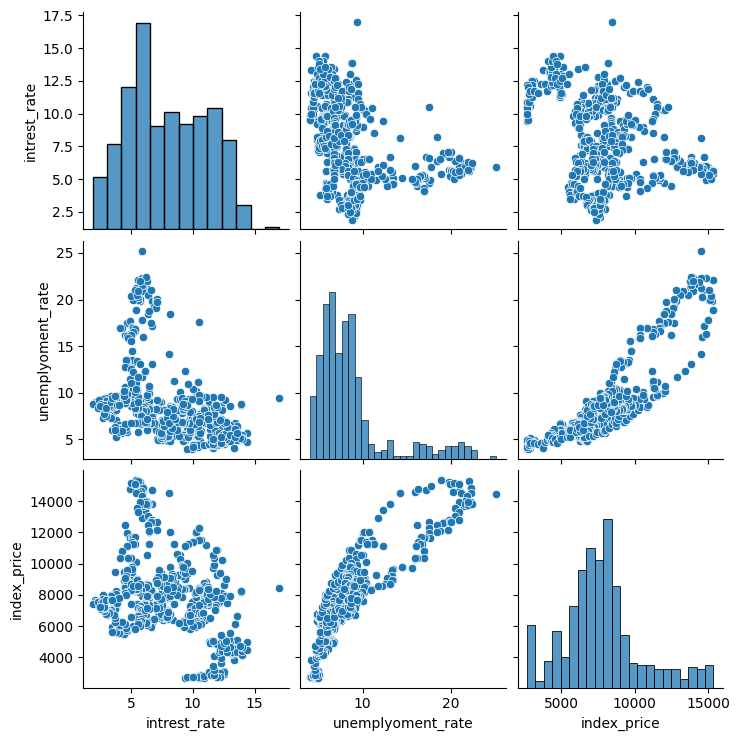

In [31]:
import seaborn as sns
sns.pairplot(df)

In [32]:
df.corr()

,intrest_rate,unemplyoment_rate,index_price
intrest_rate,1.000000,-0.387416,-0.354007
unemplyoment_rate,-0.387416,1.000000,0.869406
index_price,-0.354007,0.869406,1.000000


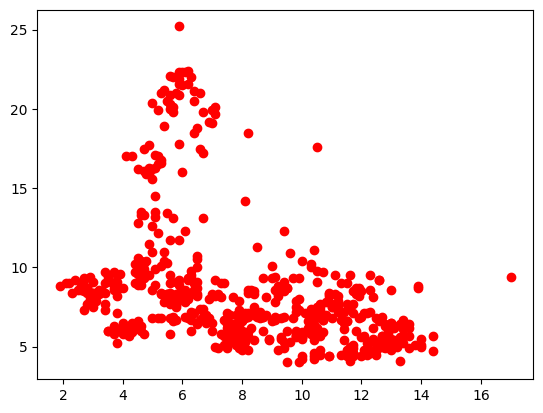

In [33]:
plt.scatter(df['intrest_rate'],df['unemplyoment_rate'],color='r')

In [34]:
# creating indipendent and dependent features
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [37]:
x.head(2)


,intrest_rate,unemplyoment_rate
0,12.5,4.5
1,12.5,4.7


In [40]:
y.head(2)

0    2944
1    2945
Name: index_price, dtype: int64

In [42]:
# splitting to traing and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
x_test.head(2)

,intrest_rate,unemplyoment_rate
514,6.0,22.3
70,12.8,4.9


In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [54]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [56]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()


In [58]:
mlr.fit(x_train,y_train)

LinearRegression()

In [59]:
from sklearn.model_selection import cross_val_score
valid_score = cross_val_score(mlr,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [60]:
valid_score

array([-2141262.69180598, -1228705.36722534, -1618519.41098817])

In [65]:
y_pred= mlr.predict(x_test)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2207668.0560463616
1131.9203349460809
1485.8223500965253


In [68]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7661689152912181


In [69]:
adr2= 1 -( (1-score)*(len(y_test)-1)/(len(y_pred)-2))
adr2

0.7645222175115788

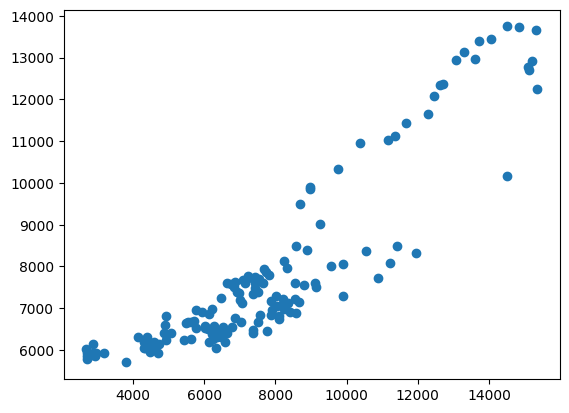

In [70]:
plt.scatter(y_test,y_pred)

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


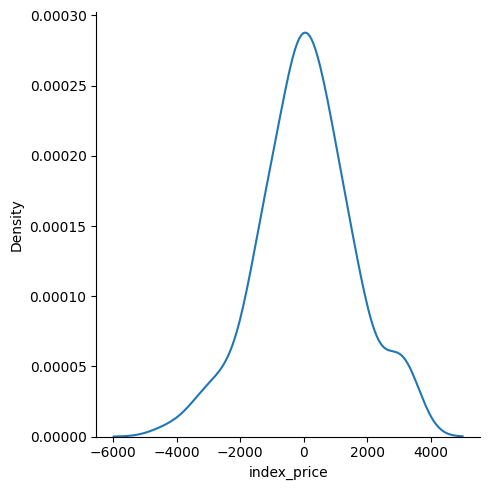

In [71]:
residuals = y_pred-y_test
sns.displot(residuals,kind='kde')

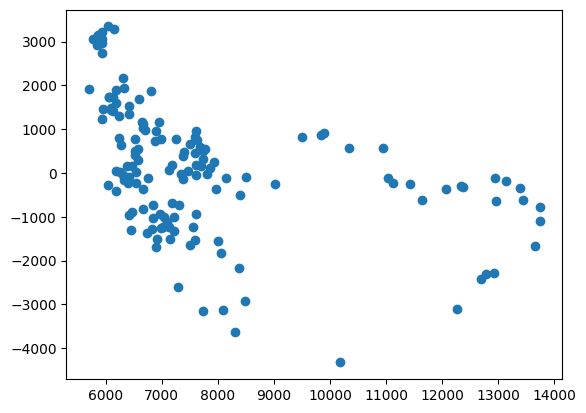

In [72]:
plt.scatter(y_pred,residuals)

In [73]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              15.36
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                    3.60e-07
Time:                        12:07:34   Log-Likelihood:                         -4469.1
No. Observations:                 430   AIC:                                      8942.
Df Residuals:                     428   BIC:                                      8950.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -27.4727    410.454     -0.067      0.947    -834.230     779.285
x2          2105.9868    410.454      5.131      0.000    1299.230    2912.744
==============================================================================
Omnibus:                        2.258   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                2.316
Skew:                           0.172   Prob(JB):                        0.314
Kurtosis:                       2.898   Cond. No.                         1.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print("Coffiecient",mlr.coef_)
print("INtercept is",mlr.intercept_)

Coffiecient [ -27.47270383 2105.98680473]
INtercept is 7792.674418604651
